In [1]:
# see https://en.wikipedia.org/wiki/K-means_clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
np.random.seed(123)
%matplotlib inline

Shape of dataset: (1000, 2)


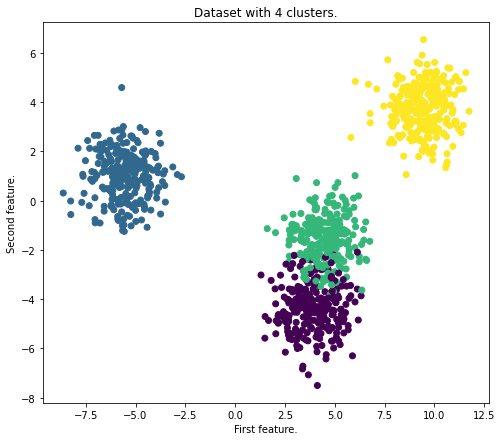

In [3]:
# dataset
x, y = make_blobs(centers = 4, n_samples = 1000)
print(f'Shape of dataset: {x.shape}')

fig = plt.figure(figsize = (8,7))
plt.scatter(x[:,0], x[:,1], c = y)
plt.title('Dataset with 4 clusters.')
plt.xlabel('First feature.')
plt.ylabel('Second feature.')
plt.show()

In [4]:
# K-means class
class Kmeans():
    def __init__(self, n_clusters = 4):
        self.k = n_clusters
        
    def fit(self, data):
        # fits the K-means model to the given dataset
        n_samples, _ = data.shape
        # initialize cluster centers
        self.centers = np.array(random.sample(list(data), self.k))
        
        self.initial_centers = np.copy(self.centers)

        # We will keep track of whether the assignment of data points
        # to the clusters has changed. If it stops changing, we are 
        # done fitting the model
        old_assigns = None
        n_iters = 0

        while True:
            new_assigns = [self.classify(datapoint) for datapoint in data]

            if new_assigns == old_assigns:
                print(f"Training finished after {n_iters} iterations!")
                return

            old_assigns = new_assigns
            n_iters += 1

            # recalculate centers
            for id_ in range(self.k):
                points_idx = np.where(np.array(new_assigns) == id_)
                datapoints = data[points_idx]
                self.centers[id_] = datapoints.mean(axis=0)

    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists

    def classify(self, datapoint):
        """
        Given a datapoint, compute the cluster closest to the
        datapoint. Return the cluster ID of that cluster.
        """
        dists = self.l2_distance(datapoint)
        return np.argmin(dists)

    def plot_clusters(self, data):
        plt.figure(figsize=(12,10))
        plt.title("Initial centers in black, final centers in red")
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=y)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='k')
        plt.show()

In [5]:
kmeans = Kmeans(n_clusters = 4)
kmeans.fit(x)

Training finished after 9 iterations!


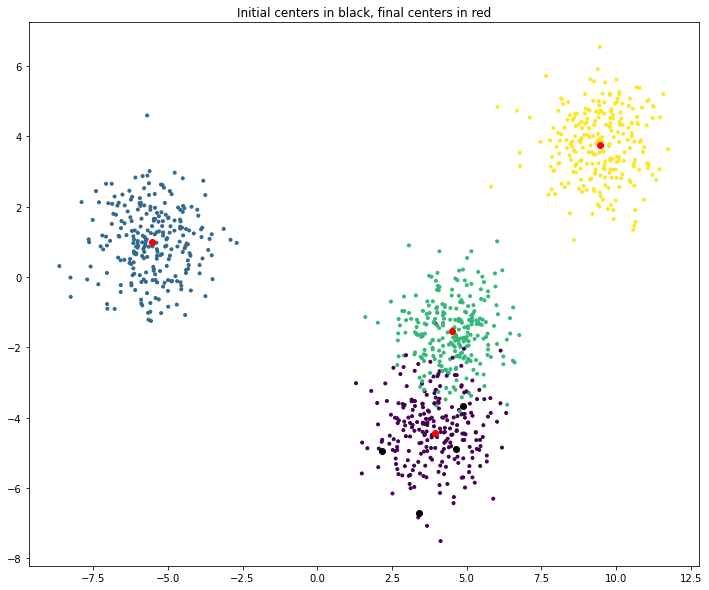

In [6]:
kmeans.plot_clusters(x)